#  1 Загрузка и подготовка данных

In [80]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [81]:
# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']
try:
    df1=pd.read_csv('SOP1.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)

    df2=pd.read_csv('SOP2.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    df3=pd.read_csv('SOP3.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    df1=df1.drop([0,0]) # удаление технической строки
    df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс
    df2=df2.drop([0,0]) # удаление технической строки
    df2=df2.drop(columns=[17,0])  # удаление лишних столбцов,   расстояние мм будет индекс 
    df3=df3.drop([0,0]) # удаление технической строки
    df3=df3.drop(columns=[17,0])# удаление лишних столбцов,   расстояние мм будет индекс
    df1=df1.astype("float32")# приводим данные к float
    df2=df2.astype("float32")# приводим данные к float
    df3=df3.astype("float32")# приводим данные к float
    print('Данные  обработаны ')
except:
    print('Данные не обработались ')


Данные загруженны 
Данные  обработаны 


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
#Здесь указываем требуемый датафрейм
df11=df3.copy()

#Приведение к общей координате
for n in range(1,17):
    df11[n]=np.roll(df11[n],-50)
    
for p in [3,4,5,6,9,10]:
    df11[n]=np.roll(df11[n],95)
    
for n in range(1,17):
    df11[n]=np.roll(df11[n],-95)
    
#Создание датафреймов по стороне и по типу деффекта    
#df11A=df11[[1,11,13,3,9,5]].copy()
#df11B=df11[[2,12,14,4,10,6]].copy()
#df11P=df11[[7,8,15,16]].copy()

In [83]:
#Загрузка файла с целевой переменной
#Здесь указываем требуемый таргет
targ=pd.read_table('target3.csv',sep=',')
targ
targ.fillna(0)

#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df11['deffect']=0
for n in range(len(targ)):
    if targ['Сторона'][n]=='A':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1
    if targ['Сторона'][n]=='B':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=2  
    if targ['Тип дефекта'][n]=='T':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n])]=3

C:\Users\tai-sku\AppData\Local\Temp/ipykernel_14024/254158828.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1
C:\Users\tai-sku\AppData\Local\Temp/ipykernel_14024/254158828.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=2
C:\Users\tai-sku\AppData\Local\Temp/ipykernel_14024/254158828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

<IPython.core.display.Javascript object>


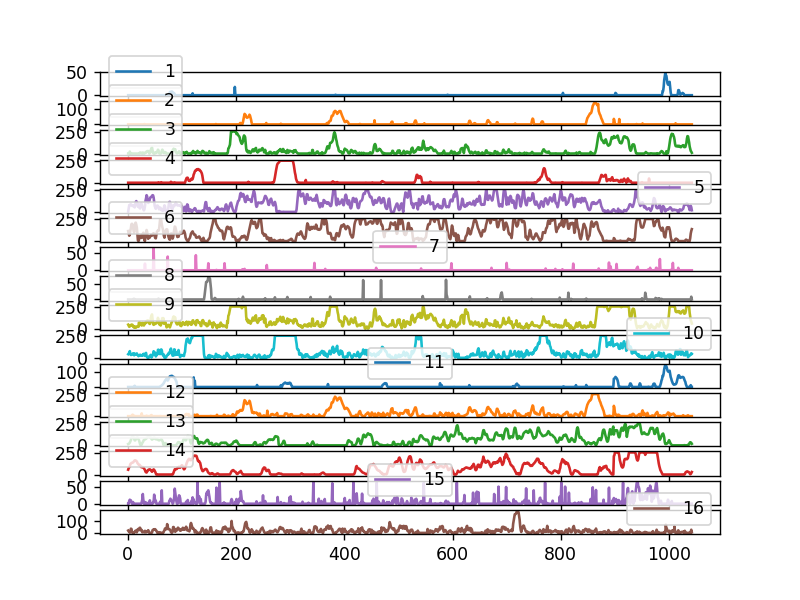

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [6]:
df11.plot.line(subplots=True)

In [84]:
from sklearn import cluster as cl
from sklearn  import preprocessing  as pr

In [88]:
#Зделаем препроцессинг данных (подготовку)
SC=pr.StandardScaler()
df11X=df11[[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
y=df11.deffect
X=SC.fit_transform(df11X)

# Используем несколько алгоритмов кластеризации
KM=cl.KMeans(n_clusters=6,  init='k-means++', n_init=10, max_iter=300, 
          tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
DB=cl.DBSCAN(eps=50,  min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', 
       leaf_size=30, p=None, n_jobs=None)
AP=cl.AffinityPropagation( damping=0.5, max_iter=200, convergence_iter=15, copy=True,
                    preference=None, affinity='euclidean', verbose=False, random_state=None)

AC=cl.AgglomerativeClustering(n_clusters=6,  affinity='euclidean', memory=None, connectivity=None, 
                        compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

OP=cl.OPTICS( min_samples=5, max_eps=50, metric='minkowski', p=2, metric_params=None, cluster_method='xi', 
       eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', 
       leaf_size=30, memory=None, n_jobs=None)

df111=df11.copy()
df111['KmeansSC']=KM.fit_predict(X)
#df111['DBSCANSC']=DB.fit_predict(X)
#df111['APSC']=DB.fit_predict(X)
df111['ACSC']=AC.fit_predict(X)
df111['OPSC']=OP.fit_predict(X)

df111['Kmeans']=KM.fit_predict(df11)
df111['DBSCAN']=DB.fit_predict(df11)
df111['AP']=AP.fit_predict(df11)
df111['AC']=AC.fit_predict(df11)
df111['OP']=OP.fit_predict(df11)

C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strin

<IPython.core.display.Javascript object>


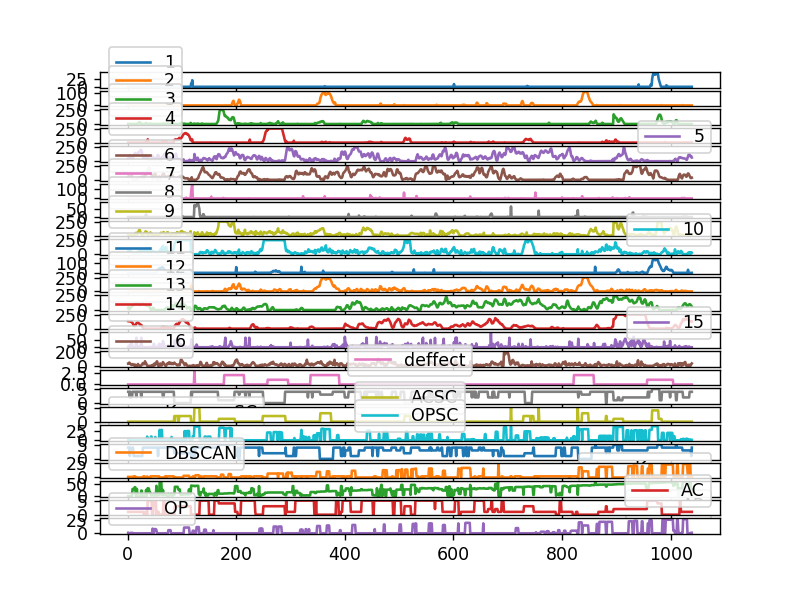

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

In [54]:
df111.plot.line(subplots=True)

#  Теперь сделаем классификацию из полученных результатов

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [89]:
X=df111[[         1,          2,          3,          4,          5,          6,
                7,          8,          9,         10,         11,         12,
               13,         14,         15,         16, 'KmeansSC',
           'ACSC',     'OPSC',   'Kmeans',   'DBSCAN',       'AP',       'AC',
             'OP']]
y=df111.deffect

MiMa=pr.Normalizer()#pr.MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

X=MiMa.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


((312, 24), (312,))

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.95
Precision: 0.90
Recall: 0.94
F1: 0.92

Матрица ошибок:
[[225   7   3]
 [  2  25   0]
 [  3   0  47]]


In [70]:
#Отображение важности признаков
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=12, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1: 0.94

Матрица ошибок:
[[227   6   3]
 [  1  26   0]
 [  2   0  47]]


In [74]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1: 0.94

Матрица ошибок:
[[227   6   3]
 [  1  26   0]
 [  2   0  47]]


<IPython.core.display.Javascript object>


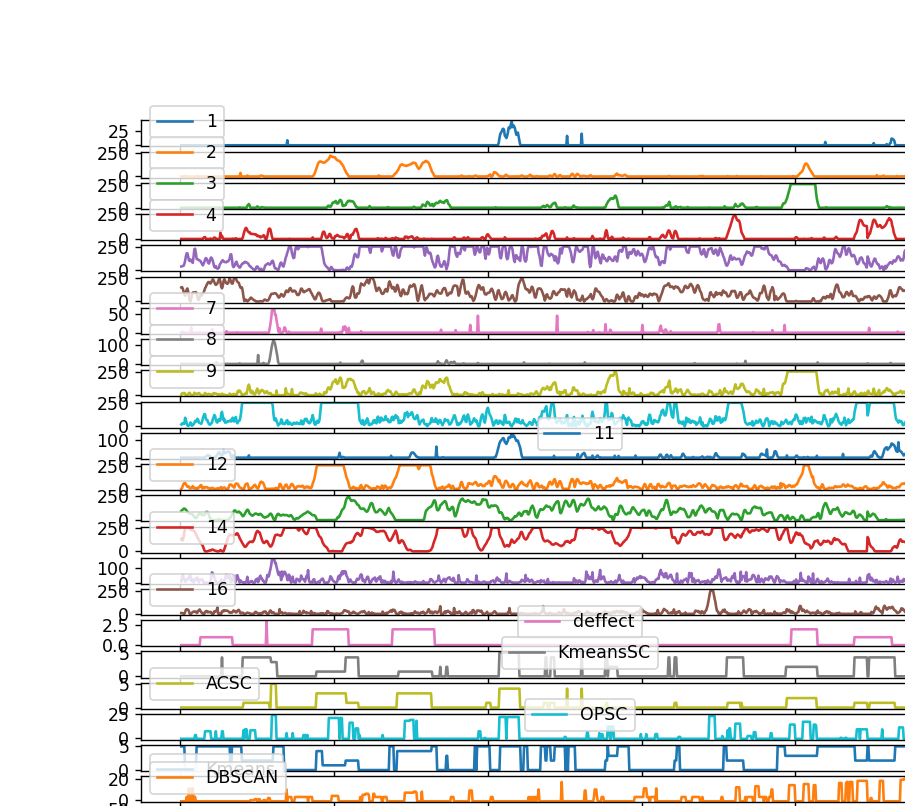

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

In [75]:
df111.plot.line(subplots=True)